import library

In [2]:
import pandas as pd
import os

In [ ]:
def return_extracted_info(folder_path, query_type):

    """
    Extracts and processes information from Excel files in a specified folder and returns two DataFrames.

    Parameters:
    folder_path (str): Path to the folder containing Excel files.
    query_type (str): The type of query, used to label the extracted data.

    Returns:
    tuple: A tuple containing two pandas DataFrames:
        - DataFrame 1: Contains the extracted information in wide format with columns 
          ["Questions", "BioChirp", "BioChirp time taken (s)", "OpenAI", "Llama", "Type"].
        - DataFrame 2: A subset of the first DataFrame with columns 
          ["Questions", "BioChirp time taken (s)", "Type"].

    Notes:
    - This function processes all Excel files (.xlsx or .xls) in the specified folder.
    - Each Excel file should have sheets named "general", "BioChirp", "OpenAI", and "Llama".
    - The "general" sheet should contain the question and time taken in specific rows and columns.
    - The function handles exceptions during processing and skips files that cannot be processed.
    - The data is converted to both wide and long formats, with the long format used for internal consistency.
    """


    tmp = pd.DataFrame(columns = ["Questions", "BioChirp", "BioChirp time taken (s)", "OpenAI", "Llama"])
    c = 0
    # Iterate through each file in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is an Excel file
        if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
            file_path = os.path.join(folder_path, file_name)
            try:
                # Load the Excel file into a DataFrame
                excel_data = pd.ExcelFile(file_path)
                
                # print(f"Processing file: {file_name}")
                tmp.loc[c, "Questions"] = excel_data.parse("general") .iloc[0,1]
                tmp.loc[c, "BioChirp time taken (s)"] = excel_data.parse("general").iloc[3,1]
                
                # Iterate through each sheet in the Excel file
                for sheet_name in ["BioChirp", "OpenAI", "Llama"]:
                    # print(f"  Reading sheet: {sheet_name}")
                    df = excel_data.parse(sheet_name)
                    tmp.loc[c, sheet_name] = df.shape[0]
                    # print(f"  Data from {sheet_name}:\n", df.head())  # Display first few rows as an example

        
                
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

        c = c + 1

    # Convert from wide to long format
    df_long = pd.melt(tmp[["Questions", "BioChirp", "OpenAI", "Llama"]], 
                    id_vars=["Questions"], 
                    var_name="Tool", 
                    value_name="Row count")
    df_long["Type"] = query_type
    tmp["Type"] = query_type

    # Display the long-format DataFrame
    # print(df_long)

    return tmp, tmp[["Questions", "BioChirp time taken (s)", "Type"]]


In [12]:
direct_question_stat, direct_question_time = return_extracted_info(folder_path = "/home/abhishekh/Downloads/BioChirp/Output/direct", query_type = "direct")

In [13]:
semantic_question_stat, semantic_question_time = return_extracted_info(folder_path = "/home/abhishekh/Downloads/BioChirp/Output/semantic", query_type = "semantic")

In [92]:
direct_question_stat

,Questions,BioChirp,BioChirp time taken (s),OpenAI,Llama,Type
0,What diseases are targeted by Carboprost Trome...,1,4.120752,4,5,direct
1,Which pathways are linked to drugs with Modula...,267,2.963631,5,12,direct
2,Provide a list of drugs used in the treatment ...,60,2.762899,10,13,direct
3,List the approval statuses of drugs that targe...,10,3.558898,5,2,direct
4,What are the key diseases linked to the cAMP s...,1,4.248453,3,3,direct
5,What is the SMILES structure of the drug assoc...,22,5.301278,3,1,direct
6,Which drugs have inhibitor mechanisms in the c...,1599,4.137778,4,9,direct
7,Which drugs have an inhibitor mechanism in the...,2030,4.038755,5,8,direct
8,What diseases are related to the Ras signaling...,193,2.988634,5,6,direct
9,What genes are involved in interactions with o...,1,3.834471,10,17,direct


In [91]:
semantic_question_stat

,Questions,BioChirp,BioChirp time taken (s),OpenAI,Llama,Type
0,List all drugs that target adrenergic receptors.,738,16.787033,10,15,semantic
1,List drugs that act as antagonists to the CXCR...,3,30.401122,3,5,semantic
2,What major diseases are associated with the JA...,58,11.162684,7,8,semantic
3,Identify targets linked to autoimmune diseases.,407,12.232994,10,9,semantic
4,What are the primary mechanisms of action for ...,74,13.71702,5,8,semantic
5,Provide drugs that target FGFR mutations in va...,29,29.094459,5,7,semantic
6,List drugs that act as antagonists to IL-1 in ...,2,24.797047,3,4,semantic
7,Which drugs are being developed to target the ...,7,36.442267,7,10,semantic
8,List all therapies targeting the PI3K pathway ...,85,6.889693,6,10,semantic
9,Provide the drugs used to treat diabetes.,445,11.79333,7,13,semantic


In [18]:
total_question_time = pd.concat([direct_question_time, semantic_question_time])
# total_question_time

In [ ]:
# total_question_time

,Questions,BioChirp time taken (s),Type
0,What diseases are targeted by Carboprost Trome...,4.120752,direct
1,Which pathways are linked to drugs with Modula...,2.963631,direct
2,Provide a list of drugs used in the treatment ...,2.762899,direct
3,List the approval statuses of drugs that targe...,3.558898,direct
4,What are the key diseases linked to the cAMP s...,4.248453,direct
...,...,...,...
15,Which major pathways are associated with neuro...,10.11054,semantic
16,List diseases associated with tyrosine kinase ...,37.816302,semantic
17,Provide drugs that target PARP.,10.655055,semantic
18,Give me a list of all phase 2 drugs that targe...,3.968981,semantic


In [25]:
def custom_figure_axis(ax, fontsize=10, show_ticks = True, rotation=90):
    
        
    """
    Customize the appearance of matplotlib axis for a figure.
    
    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The axis to be customized.
        fontsize (int, optional): Font size for axis labels and ticks. Default is 10.
        show_ticks (bool, optional): Whether to display ticks and labels. Default is True.
    
    Returns:
        matplotlib.axes._subplots.AxesSubplot: The customized axis.
    """
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['left'].set_linewidth(0.2)
    ax.tick_params(axis='x', labelsize=fontsize, rotation=rotation)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.tick_params(axis='both', which='both', width=0.5)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    
    if show_ticks==False:
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    return ax


##### Plot row counts across methods and time consumed 

/home/abhishekh/anaconda3/envs/ttd2/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


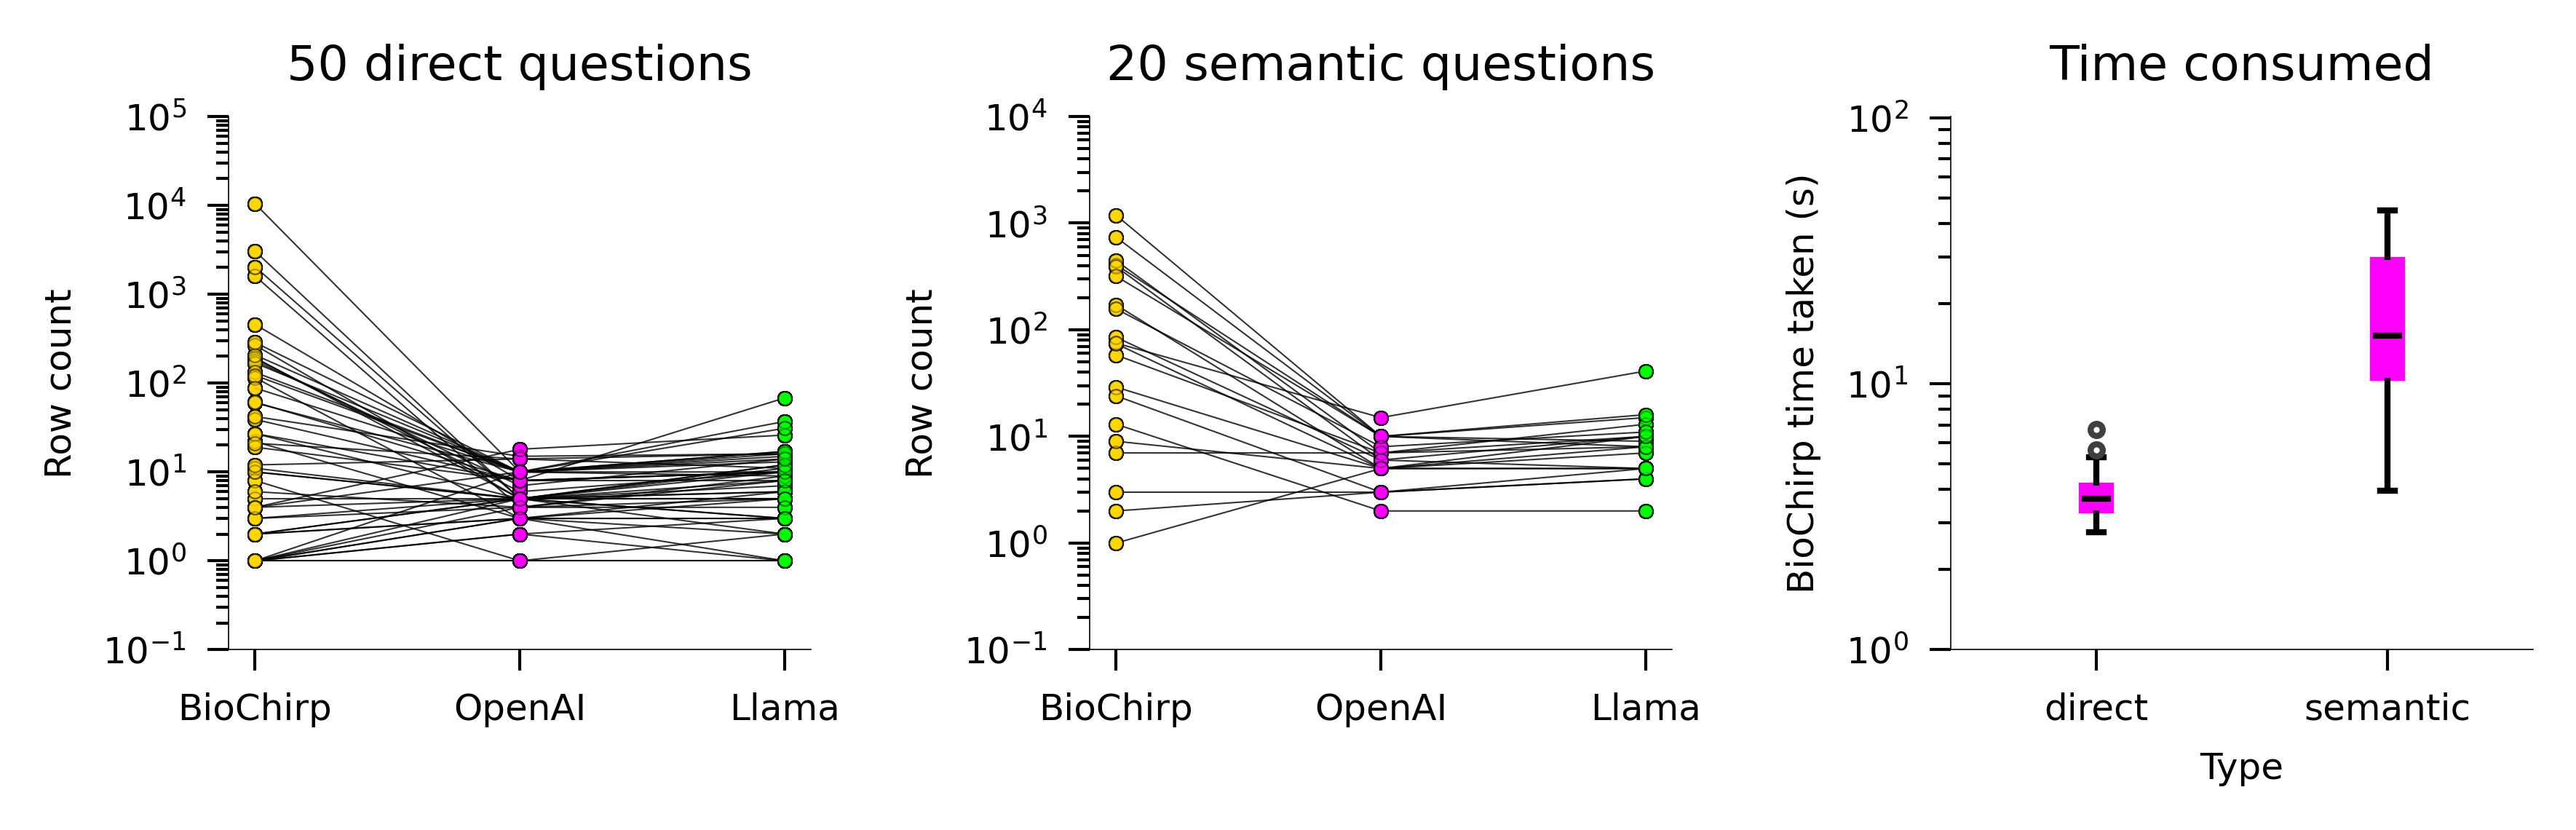

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize =(6, 2), dpi = 600)

for i in range(len(direct_question_stat)):
    ax[0].plot(['BioChirp', 'OpenAI', 'Llama'], [direct_question_stat.loc[i, 'BioChirp'], direct_question_stat.loc[i, 'OpenAI'], direct_question_stat.loc[i, 'Llama']], 
         color='black', alpha=0.8, zorder=1, lw = 0.25, mew=0)
    
    ax[0].scatter(['BioChirp']*len(direct_question_stat), direct_question_stat['BioChirp'], color='gold', edgecolor='black', s=5, label='BioChirp', linewidths=0.25, alpha = 0.5)
    ax[0].scatter(['OpenAI']*len(direct_question_stat), direct_question_stat['OpenAI'], color='magenta', edgecolor='black', s=5, label='OpenAI', linewidths=0.25, alpha = 0.5)
    ax[0].scatter(['Llama']*len(direct_question_stat), direct_question_stat['Llama'], color='lime', edgecolor='black', s=5, label='Llama', linewidths=0.25, alpha = 0.5)


for i in range(len(semantic_question_stat)):
    ax[1].plot(['BioChirp', 'OpenAI', 'Llama'], [semantic_question_stat.loc[i, 'BioChirp'], semantic_question_stat.loc[i, 'OpenAI'], semantic_question_stat.loc[i, 'Llama']], 
              color='black', alpha=0.8, zorder=0, lw = 0.25, mew=1)
    
    # ax[1] = sns.scatterplot(data=df, x='x', y='y', hue='group', style='group', size=5, palette='viridis')

    
    ax[1].scatter(['BioChirp']*len(semantic_question_stat), semantic_question_stat['BioChirp'], color='gold', edgecolor='black', s=5, label='BioChirp', linewidths=0.25, alpha = 0.5)
    ax[1].scatter(['OpenAI']*len(semantic_question_stat), semantic_question_stat['OpenAI'], color='magenta', edgecolor='black', s=5, label='OpenAI', linewidths=0.25, alpha = 0.5)
    ax[1].scatter(['Llama']*len(semantic_question_stat), semantic_question_stat['Llama'], color='lime', edgecolor='black', s=5, label='Llama', linewidths=0.25, alpha = 0.5)



ax[2] = sns.boxplot(total_question_time, y = "BioChirp time taken (s)", x = "Type", ax =ax[2], boxprops=dict(color='magenta'),  # Set the color of the box to lime
    whiskerprops=dict(color='black'),  # Set whisker color to lime
    capprops=dict(color='black'),  # Set cap color to lime
    medianprops=dict(color='black'), width=0.1, flierprops = dict(marker='o', color='red', alpha=1, markersize=2))

ax[0].set_ylabel("Row count")
ax[0].set_yscale("log")
ax[1].set_ylabel("Row count")
ax[1].set_yscale("log")
ax[2].set_yscale("log")

ax[0].set_ylim(0.1, 100001)
ax[1].set_ylim(0.1, 10001)
ax[2].set_ylim(1, 101)

ax[0].set_title("50 direct questions", fontsize = 8)
ax[1].set_title("20 semantic questions", fontsize = 8)
ax[2].set_title("Time consumed", fontsize = 8)

ax[0] = custom_figure_axis(ax[0], fontsize=6, show_ticks = True, rotation=0)
ax[1] = custom_figure_axis(ax[1], fontsize=6, show_ticks = True, rotation=0)
ax[2] = custom_figure_axis(ax[2], fontsize=6, show_ticks = True, rotation=0)
plt.tight_layout()
# plt.savefig("QA.pdf", dpi = 600)
plt.savefig("QA.png", dpi = 600)